## Seattle AirBnB
This notebook explores the Seattle Airbnb Open Data
https://www.kaggle.com/airbnb/seattle/data

First let's import some packages that will likely come in handy:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

In [2]:
calendar_df = pd.read_csv('../data/calendar.csv') 
listings_df = pd.read_csv('../data/listings.csv')
reviews_df = pd.read_csv('../data/reviews.csv')

In [3]:
calendar_df.head(3)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN


In [4]:
print(calendar_df.count())
print(calendar_df.count()/calendar_df.shape[0])

listing_id    1393570
date          1393570
available     1393570
price          934542
dtype: int64
listing_id    1.00000
date          1.00000
available     1.00000
price         0.67061
dtype: float64


Some of the price data (~33%) is missing.

In [5]:
listings_df.shape

(3818, 92)

In [6]:
print(listings_df.columns)
listings_df.describe()

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


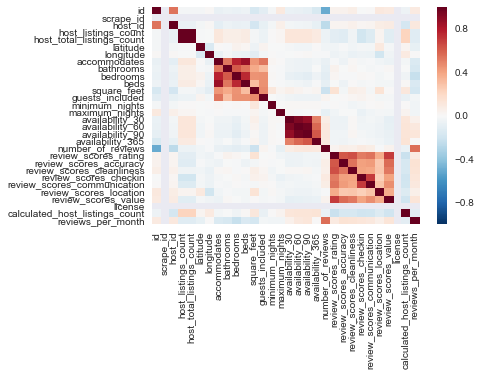

In [7]:
sns.heatmap(listings_df.corr());

It looks like some of these variables are highly correlated, mostly as we would expect -- for example, if one review score is high, the others are likely high as well (eg. rating, accuracy, cleanliness, checkin, communication, value); the location review is the least correlated to the others, which also makes sense. 

Likewise, availabilities are highly correlated (30, 60, 90, 365) as are the variables related to the house size (accomodates, bathrooms, bedrooms, beds, square feet). When determining predictor variables to use, we won't want to use all of the highly correlated values, but perhaps only one most representative value from each group. 

Let's look at a correlation matrix with a reduced number of variables, first let's find a list of the most highly correlated variables in a systematic way. Here I'm following steps from this 
https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/

In [8]:
# Create correlation matrix
corr_matrix = listings_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

['host_total_listings_count', 'availability_90']

Here we can see that we found the two most highly correlated features. Let's turn this into a function and test some different thresholds to see if we can get some of the other variables we saw that look like they have high correlations. Looking at the heatmap, let's try a correlation threshold of 0.8 to see what that gives us:

In [9]:
def find_correlated_features(df,threshold):
    # Create correlation matrix
    corr_matrix = df.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find index of feature columns with correlation greater than 0.95
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    return to_drop

In [10]:
corr_cols = find_correlated_features(listings_df,0.8)
print(corr_cols)

['host_total_listings_count', 'beds', 'availability_60', 'availability_90']


Ok, this gave us a few more. Let's loop through a number of different thresholds from 0.5 to 0.9 and list the correlated columns for each threshold. We can then select the set that looks the best, upon comparison:

In [11]:
thresholds = [0.5,0.6,0.7,0.8,0.9]
for t in thresholds:
    cols = find_correlated_features(listings_df,t)
    print(str(t) + ':' + ','.join(cols))

0.5:host_id,host_total_listings_count,bathrooms,bedrooms,beds,guests_included,availability_60,availability_90,availability_365,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_value,reviews_per_month
0.6:host_total_listings_count,bedrooms,beds,availability_60,availability_90,availability_365,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_value
0.7:host_total_listings_count,bedrooms,beds,availability_60,availability_90
0.8:host_total_listings_count,beds,availability_60,availability_90
0.9:host_total_listings_count,availability_60,availability_90


In [12]:
# Drop features with > 50% correlation
cols_to_drop = find_correlated_features(listings_df,0.5)
listings_df2 = listings_df.copy().drop(listings_df[cols_to_drop], axis=1)

In [13]:
#Let's also remove columns with missing values
listings_df2.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_rating,review_scores_location,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,95.0,9.0,f,NaN,WASHINGTON,f,moderate,f,f,2
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,96.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,97.0,10.0,f,NaN,WASHINGTON,f,strict,f,f,2
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,92.0,9.0,f,NaN,WASHINGTON,f,strict,f,f,1


In [19]:
listings_df.drop?

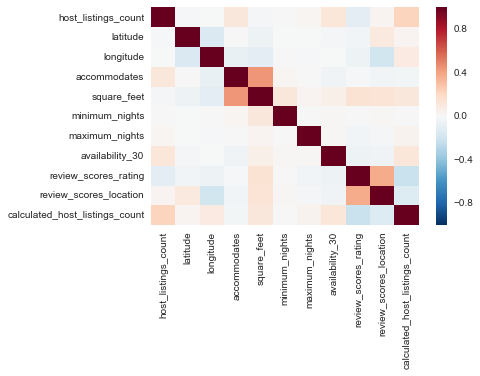

In [20]:
listings_df2 = listings_df2.drop(labels=['id','scrape_id','license'],axis=1)
sns.heatmap(listings_df2.corr());

C:\Users\bhass\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


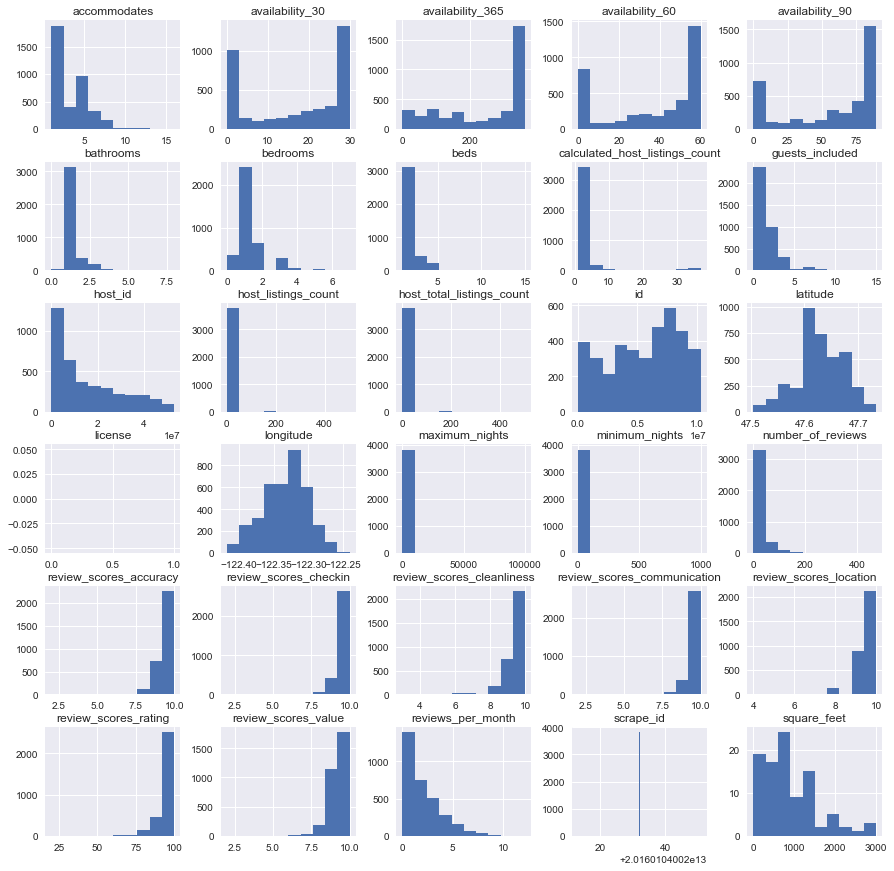

In [14]:
fig = plt.figure(figsize = (15,15))
listings_df.hist(ax = fig.gca());

In [21]:
most_missing_cols = set(listings_df.columns[listings_df.isnull().mean() > 0.5])
most_missing_cols

{'license', 'monthly_price', 'security_deposit', 'square_feet'}

In [22]:
print(listings_df.shape)
print(listings_df.dropna(how='all',axis=1).shape)
listings_df['scrape_id'].describe()

(3818, 92)
(3818, 91)


count    3.818000e+03
mean     2.016010e+13
std      0.000000e+00
min      2.016010e+13
25%      2.016010e+13
50%      2.016010e+13
75%      2.016010e+13
max      2.016010e+13
Name: scrape_id, dtype: float64

In [23]:
reviews_df.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [24]:
listings_df['neighbourhood'].unique()

array(['Queen Anne', nan, 'Ballard', 'Phinney Ridge', 'Fremont',
       'Lower Queen Anne', 'Westlake', 'Wallingford', 'Green Lake',
       'Minor', 'Madrona', 'Harrison/Denny-Blaine', 'Leschi',
       'University District', 'Roosevelt', 'Madison Park', 'Capitol Hill',
       'Atlantic', 'North Beacon Hill', 'Central Business District',
       'Pike Place Market', 'Pike Market', 'Eastlake', 'Portage Bay',
       'South Lake Union', 'Magnolia', 'Belltown',
       'International District', 'Yesler Terrace', 'First Hill',
       'Pioneer Square', 'Gatewood', 'The Junction', 'Arbor Heights',
       'Alki', 'North Admiral', 'Crown Hill', 'Genesee', 'Fairmount Park',
       'Interbay', 'Industrial District', 'Holly Park',
       'South Beacon Hill', 'Greenwood', 'Bitter Lake', 'Fauntleroy',
       'Mount Baker', 'Columbia City', 'Seward Park', 'Brighton',
       'South Delridge', 'Highland Park', 'High Point', 'View Ridge',
       'Windermere', 'Dunlap', 'Rainier Beach', 'North Delridge',
  

In [28]:
listings_df['neighbourhood'].value_counts()

Capitol Hill                 351
Ballard                      213
Belltown                     204
Minor                        192
Queen Anne                   187
Fremont                      148
Wallingford                  143
University District          107
First Hill                   105
Stevens                       98
North Beacon Hill             95
Lower Queen Anne              83
Central Business District     81
Greenwood                     79
Columbia City                 61
Ravenna                       59
Phinney Ridge                 56
Magnolia                      55
Green Lake                    52
Atlantic                      50
North Admiral                 48
Mount Baker                   46
Leschi                        44
Maple Leaf                    41
Eastlake                      41
Madrona                       40
Pike Place Market             39
The Junction                  36
Seward Park                   32
Bryant                        32
          

From this initial look at the dataset, some questions to consider include:

    1) which variables are best predictors for the overall review score `review_score_rating`?
    2) do review scores vary significantly between different neighborhoods?
    3) which neighborhoods provide the best value (ratings/price ratio)?

In [ ]:
def clean_fit_linear_mod(df, response_col, cat_cols, dummy_na, test_size=.3, rand_state=42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column 
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    
    Your function should:
    1. Drop the rows with missing response values
    2. Drop columns with NaN for all the values
    3. Use create_dummy_df to dummy categorical columns
    4. Fill the mean of the column for any missing values 
    5. Split your data into an X matrix and a response vector y
    6. Create training and test sets of data
    7. Instantiate a LinearRegression model with normalized data
    8. Fit your model to the training data
    9. Predict the response for the training data and the test data
    10. Obtain an rsquared value for both the training and test data
    '''
    #Drop the rows with missing response values
    df  = df.dropna(subset=[response_col], axis=0)

    #Drop columns with all NaN values
    df = df.dropna(how='all', axis=1)

    #Dummy categorical variables
    df = create_dummy_df(df, cat_cols, dummy_na)

    # Mean function
    fill_mean = lambda col: col.fillna(col.mean())
    # Fill the mean
    df = df.apply(fill_mean, axis=0)

    #Split into explanatory and response variables
    X = df.drop(response_col, axis=1)
    y = df[response_col]

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test

In [ ]:
#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df_new, 'Salary', cat_cols_lst, dummy_na=False)